In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [27]:
df = pd.read_csv("Churn_Modelling.csv")

df_copy = df.copy()

#EDA

In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [30]:
df.shape

(10000, 11)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [33]:
df.describe(include="object").T

,count,unique,top,freq
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


In [34]:
print("Number of Uniques:\n", df.select_dtypes('object').nunique(),'\n', sep='')

Number of Uniques:
Geography    3
Gender       2
dtype: int64



In [35]:
df.agg(['min', 'max']).T

,min,max
CreditScore,350,850
Geography,France,Spain
Gender,Female,Male
Age,18,92
Tenure,0,10
Balance,0.0,250898.09
NumOfProducts,1,4
HasCrCard,0,1
IsActiveMember,0,1
EstimatedSalary,11.58,199992.48


In [36]:
df.select_dtypes('object').head()

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


In [37]:
df.select_dtypes('number').head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

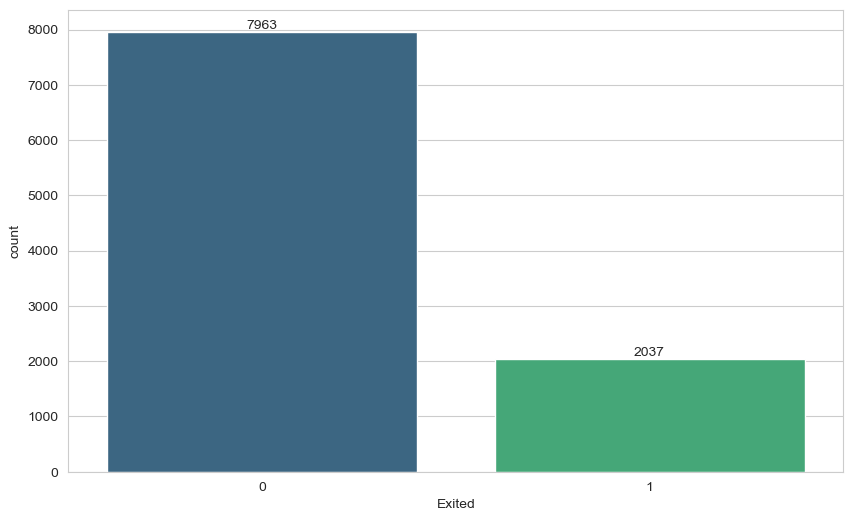

In [40]:
ax = sns.countplot(data = df, x = df["Exited"], palette="viridis")
for i in ax.containers:
  ax.bar_label(i)

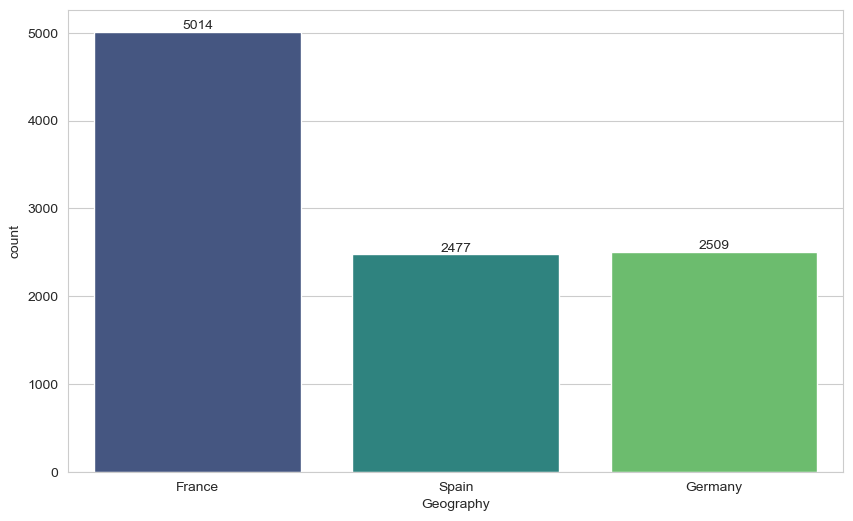

In [41]:
ax = sns.countplot(data = df, x = df["Geography"], palette="viridis")
for i in ax.containers:
  ax.bar_label(i)

<Axes: >

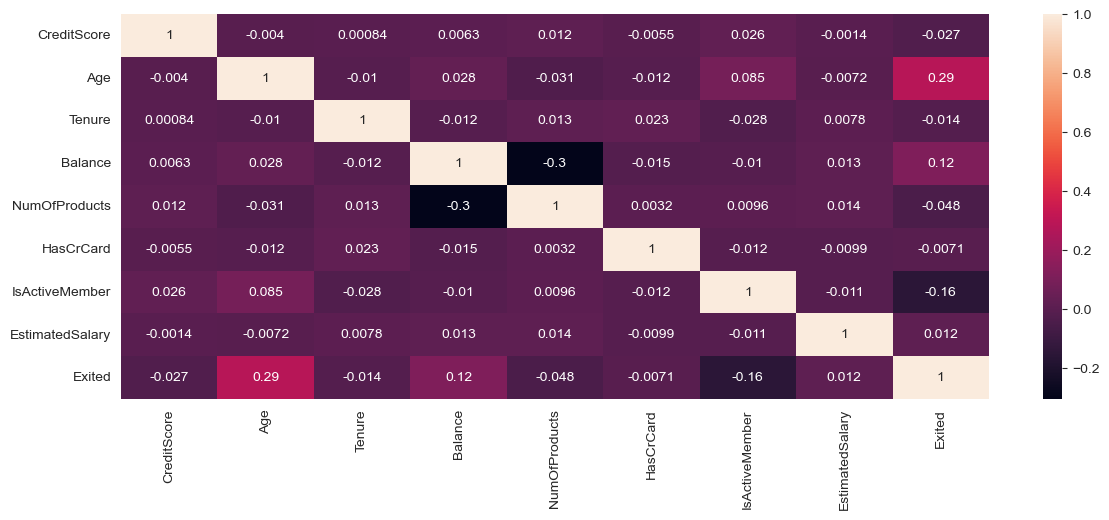

In [42]:
plt.figure(figsize=(14,5))
sns.heatmap(df.drop(["Geography", "Gender"], axis =1).corr(), annot=True)

In [43]:
df = pd.get_dummies(columns=["Gender", "Geography"], data=df, drop_first= True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,0,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,True,False


In [44]:
df[['Gender_Male', 'Geography_Germany', 'Geography_Spain']] = df[['Gender_Male','Geography_Germany', 'Geography_Spain']].astype(int)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


<Axes: >

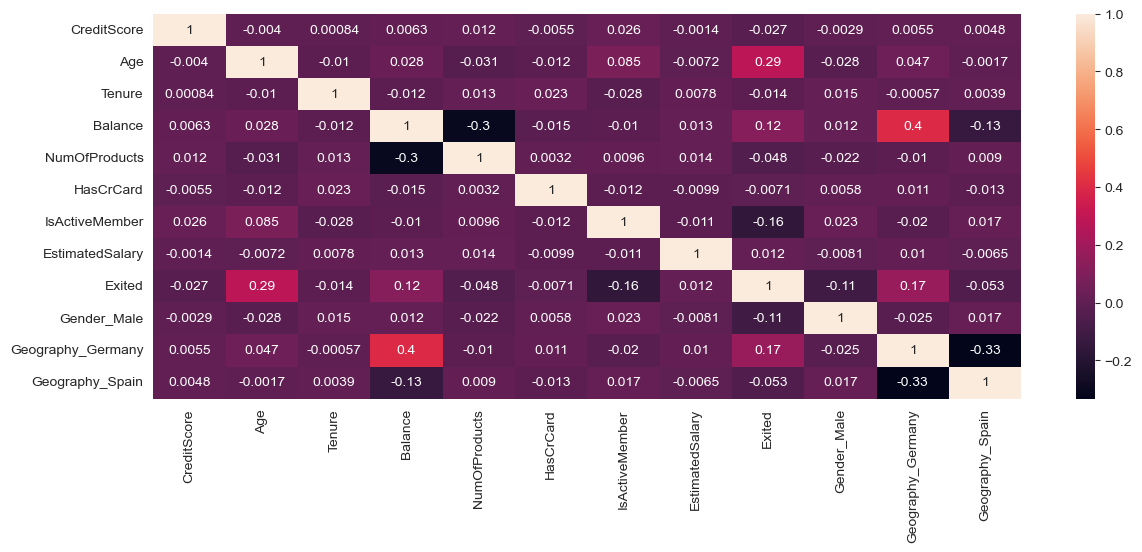

In [45]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(), annot=True)

#Modelling

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
X = df.drop(["Exited"], axis =1)
y = df["Exited"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
model = Sequential()

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
model.fit(X_train, y_train, epochs=400, batch_size= 100, validation_data=(X_test, y_test))

Epoch 1/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7849 - loss: 0.6282 - val_accuracy: 0.8035 - val_loss: 0.5061
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.7907 - loss: 0.5151 - val_accuracy: 0.8035 - val_loss: 0.4799
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.7929 - loss: 0.4933 - val_accuracy: 0.8035 - val_loss: 0.4608
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.7954 - loss: 0.4716 - val_accuracy: 0.8035 - val_loss: 0.4431
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.7946 - loss: 0.4613 - val_accuracy: 0.8035 - val_loss: 0.4342
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.7870 - loss: 0.4556 - val_accuracy: 0.8035 - val_loss: 0.4277
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 0.7897 - loss: 0.4444 - val_accuracy: 0.8035 - val_loss: 0.4218
Epoch 8/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.7856 - loss: 0.4422 - val_accura

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.7945,0.583363,0.8035,0.506149
1,0.7945,0.503788,0.8035,0.479855
2,0.7945,0.483615,0.8035,0.460824
3,0.7945,0.466749,0.8035,0.443070
4,0.7945,0.453290,0.8035,0.434188


<Axes: >

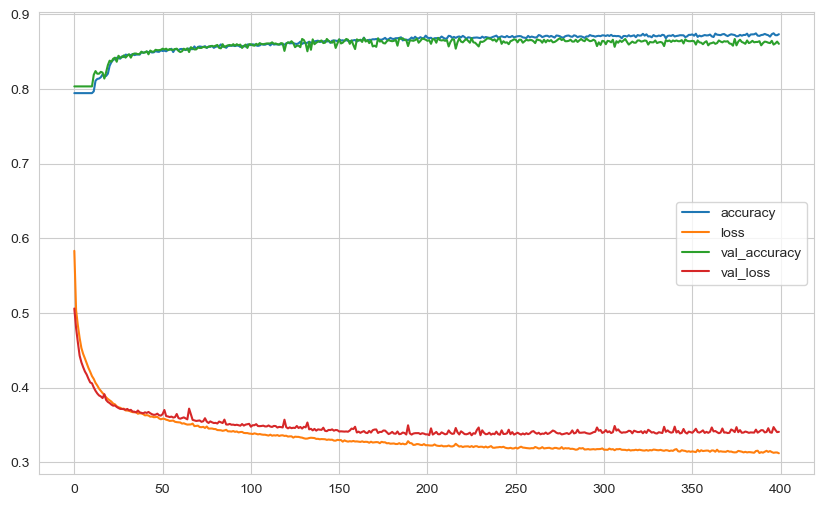

In [57]:
loss_df.plot()

In [58]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step
[[1523   84]
 [ 195  198]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.50      0.59       393

    accuracy                           0.86      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [59]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3410417437553406
accuracy :  0.8604999780654907


In [75]:
import pickle
model.save("churn_model.h5")
pickle.dump(scaler, open("scaler_churn", 'wb'))

#Loading


In [69]:
model_churn = tf.keras.models.load_model("churn_model.h5")
scaler_churn = pickle.load(open("scaler_churn", 'rb'))

#Prediction

In [70]:
single_customer_a = df.sample(1)
single_customer = single_customer_a.drop('Exited', axis = 1)
single_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
7639,541,46,6,0.0,2,1,1,83456.67,1,0,0


In [71]:
single_customer = scaler_churn.transform(single_customer)
single_customer

array([[0.382     , 0.37837838, 0.6       , 0.        , 0.33333333,
        1.        , 1.        , 0.41708185, 1.        , 0.        ,
        0.        ]])

In [72]:
(model_churn.predict(single_customer, verbose=0) > 0.5).astype("int32")[0][0]

0

In [73]:
single_customer_a.Exited.iloc[0]

0